練習問題

閾値処理を数式で書いてみよう．画素値を$x$，閾値を$T$とする．画素を白にするにはどんな値を入れるか考えてみよう．

$$
\left\{
\begin{array}{ll}
255 && (x \geq T)\\
0 && (x < T)
\end{array}
\right.
$$

## 課題1

グレースケール画像を閾値処理するプログラムを作成せよ．
閾値を50，100，150，200として，閾値処理をせよ．

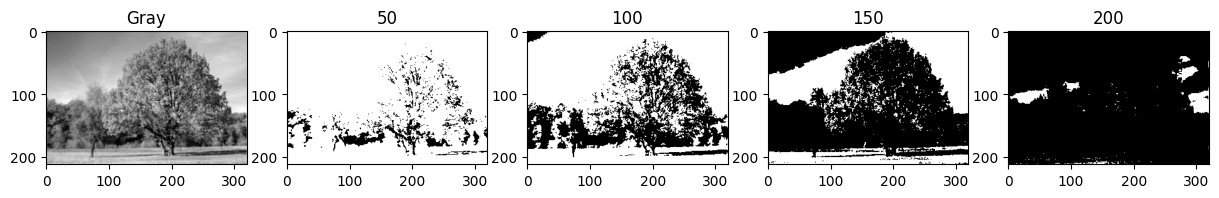

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def binarize(_img: np.ndarray, threshold: int=128):
	"グレースケール画像を2値化する関数"
	img = _img.copy()
	img[img < threshold] = 0
	img[img >= threshold] = 255
	return img

img = io.imread("imgs/gray_tree.png")
thresholds = [50*t for t in range(1, 5)]
plt.figure(figsize=(15, 3))

plt.subplot(1, len(thresholds)+1, 1)
plt.title('Gray')
plt.imshow(img, cmap="gray")

for i, t in enumerate(thresholds, start=2):
	binarized_img = binarize(img)
	plt.subplot(1, len(thresholds)+1, i)
	plt.title(t)
	binarized_img = binarize(img, t)
	plt.imshow(binarized_img, cmap="gray")

## 課題2

カラー画像に対して閾値処理をするプログラムを作成せよ．（チャンネル毎に閾値処理をする）

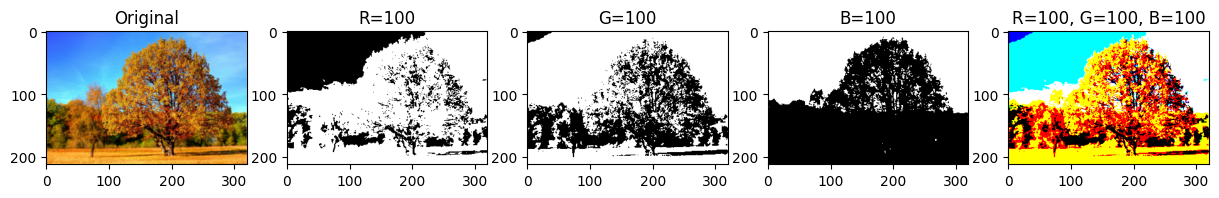

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def binarize(_img: np.ndarray, threshold: int=128):
	"画像を2値化する関数"
	img = _img.copy()
	img[img < threshold] = 0
	img[img >= threshold] = 255
	return img

img = io.imread("imgs/tree.png")
channels = ['R', 'G', 'B']
threshold = 100

plt.figure(figsize=(15, 3))

plt.subplot(1, len(channels)+2, 1)
plt.title('Original')
plt.imshow(img)

binarized_img = np.zeros_like(img)
for i, c in enumerate(channels):
	binarized_channel = binarize(img[:, :, i], threshold)
	plt.subplot(1, len(channels)+2, i+2)
	plt.title(f"{c}=100")
	plt.imshow(binarized_channel, cmap="gray")
	binarized_img[:, :, i] = binarized_channel

plt.subplot(1, len(channels)+2, len(channels)+2)
plt.title("R=100, G=100, B=100")
plt.imshow(binarized_img)